<a href="https://colab.research.google.com/github/mjvakili/MLcourse/blob/master/Decision_trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Decision trees

Decision trees is a classification method in which decision boundaries between 2 or more classes are obtained by recursively dividing a given dataset into branches based on the features of the dataset.

Consider the example of **Car Evaluation Dataset** ([link text](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation)) included in the list of UC Irvine Machine Learning Datasets. This data includes $\sim$ 1700 instances, each with 6 categorical features and 1 label. The categorical features are different car characteristics (**cost, number of doors, luggage space, safety, etc**) and the labels are the values. 

This is a very simple dataset with no correlation between the different features. But it serves as a nice example to gain intuition about how a decsiion tree classifier works. 

In what follows we copy the dataset, explore it a bit, build a simple model, and then we visualize the model. Then we try to explain different aspects of the model. 


First let's start by importing the modules needed for this session

In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from IPython.display import display
import graphviz
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
import numpy as np

Now we temporarily save acopy of the data

In [0]:
!wget --no-check-certificate \
    https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data \
    -O /tmp/car

--2019-11-25 13:40:02--  https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 51867 (51K) [application/x-httpd-php]
Saving to: ‘/tmp/car’

/tmp/car            100%[===================>]  50.65K  --.-KB/s    in 0.1s    

2019-11-25 13:40:03 (395 KB/s) - ‘/tmp/car’ saved [51867/51867]



Let's load the data with panda and name the columns according to the descriotion of the data ([car data](https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data))

In [0]:
data = pd.read_csv("/tmp/car", sep = ",", header = None)
data.columns = ['price', 'maintenance', 'ndoors', 'npersons', 'luggage', 'safety', 'value']

In [0]:
#let's look at the first five rows of the data
data.head()

,price,maintenance,ndoors,npersons,luggage,safety,value
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [0]:
#it's always a good idea to randomize the rows of the data so that the algorithm is not biased due to ordering in the data
data = shuffle(data)

Some of the categorical features in the data are strings and some are numbers. In what follows, we map the possible values of each feature to numbers.

In [0]:
price_mapping = {'vhigh': 3, 'high': 2, 'med': 1, 'low': 0}
data['price'] = data['price'].map(price_mapping)
maint_mapping = {'vhigh': 3, 'high': 2, 'med': 1, 'low': 0}
data['maintenance'] = data['maintenance'].map(maint_mapping)
data.loc[(data['ndoors'] == '5more'), 'ndoors'] = 5
data.loc[(data['npersons'] == 'more'), 'npersons'] = 5
lug_mapping = {'big': 2, 'med': 1, 'small': 0}
data['luggage'] = data['luggage'].map(lug_mapping)
safety_mapping = {'high': 2, 'med': 1, 'low': 0}
data['safety'] = data['safety'].map(safety_mapping)
value_mapping = {'unacc':0, 'acc':1, 'good':2, 'vgood':3}
data['value'] = data['value'].map(value_mapping)

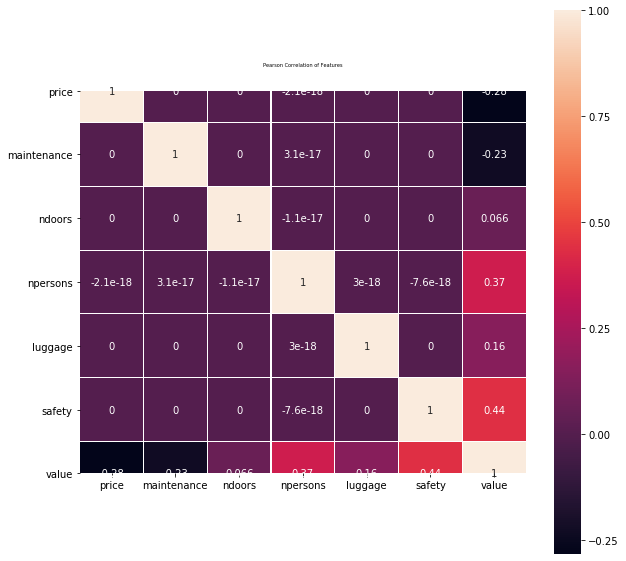

In [0]:
#Now let's look at the correlations between the features and also their correlation with the car value
plt.figure(figsize=(10,10))
plt.title('Pearson Correlation of Features', y=1.05, size=5)
sns.heatmap(data.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, linecolor='white', annot=True)

In [0]:
#let's look at the top rows of the data again
data.head()

,price,maintenance,ndoors,npersons,luggage,safety,value
438,2,3,2,2,2,0,0
1408,0,2,2,2,1,1,0
162,3,2,4,2,0,0,0
1306,0,3,2,4,0,1,0
1462,0,2,4,2,1,1,0


Now we quickly fit a decision tree classifier to the data. We will go over the details of the model a bit later.

In [0]:
from sklearn.model_selection import train_test_split
X, y = data.drop("value", axis = 1), data['value']
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, train_size = 0.8)

In [0]:
grid = GridSearchCV(make_pipeline(DecisionTreeClassifier()),
                    param_grid={'decisiontreeclassifier__max_depth': np.arange(2,20)},
                    cv=5)
grid.fit(X_trainval, y_trainval)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('decisiontreeclassifier',
                                        DecisionTreeClassifier(class_weight=None,
                                                               criterion='gini',
                                                               max_depth=None,
                                                               max_features=None,
                                                               max_leaf_nodes=None,
                                                               min_impurity_decrease=0.0,
                                                               min_impurity_split=None,
                                                               min_samples_leaf=1,
                                                               min_samples_split=2,
                                                               min_weight_fraction_l

In [0]:
print("best model = ", grid.best_params_)

best model =  {'decisiontreeclassifier__max_depth': 19}


This means that a Decsion tree classifier with a maximum depth of 12 is the model that minimizes the cross-validation error

In [0]:
test_acc = grid.score(X_test, y_test)
print("the test accuracy is = ", test_acc)

the test accuracy is =  0.9682080924855492


[0.12152536 0.16412534 0.05384401 0.18937708 0.13003448 0.34109373]


[Text(0, 0, 'price'),
 Text(0, 0, 'maintenance'),
 Text(0, 0, 'ndoors'),
 Text(0, 0, 'npersons'),
 Text(0, 0, 'luggage'),
 Text(0, 0, 'safety')]

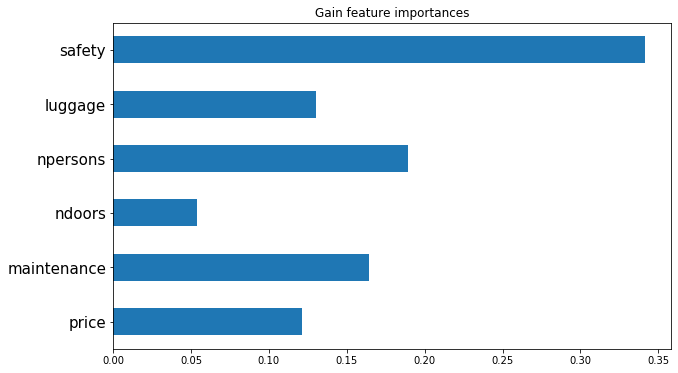

In [0]:
best_model = DecisionTreeClassifier(max_depth = 12).fit(X_trainval, y_trainval)
importances = best_model.feature_importances_
df_imp = pd.Series(importances)
print(importances)
# Visualize importances.
ax = (df_imp.iloc[:]
    .plot(kind='barh',
          color='C0',
          title='Gain feature importances',
          figsize=(10, 6)))
ax.grid(False, axis='y')
ax.set_yticklabels(X.columns, fontsize = 15)

This shows that the according to the Decision tree model, the most important feature in determining the value of a car is safety.

#So how does a Decision Tree Classifier work?

As mentioned before, this method draws decision boundaries in the space spanning the features of a given dataset. This is carried out by iteratively splitting the data into two subsets based on a given feature. 

In a decision tree, there are two important concepts: **nodes** and **branches**. The top node is the first node in a decsion tree and it contains the entire data. Then via a **branch** the top node is divided into two **child nodes** each containing disjoint subsets of the data. The **branch** is where the splitting based on a feature takes place. In the next iterations, the child nodes themselves are branched into smaller child nodes based on some feature in the data. And this process goes on until the splitting stops. 

Two important question arise: 

(1) Based on what criteria, does the splitting happen?

(2) When does the branching process stop?

Before answering these question, let's visulaize the tree model that we built with the car dataset.

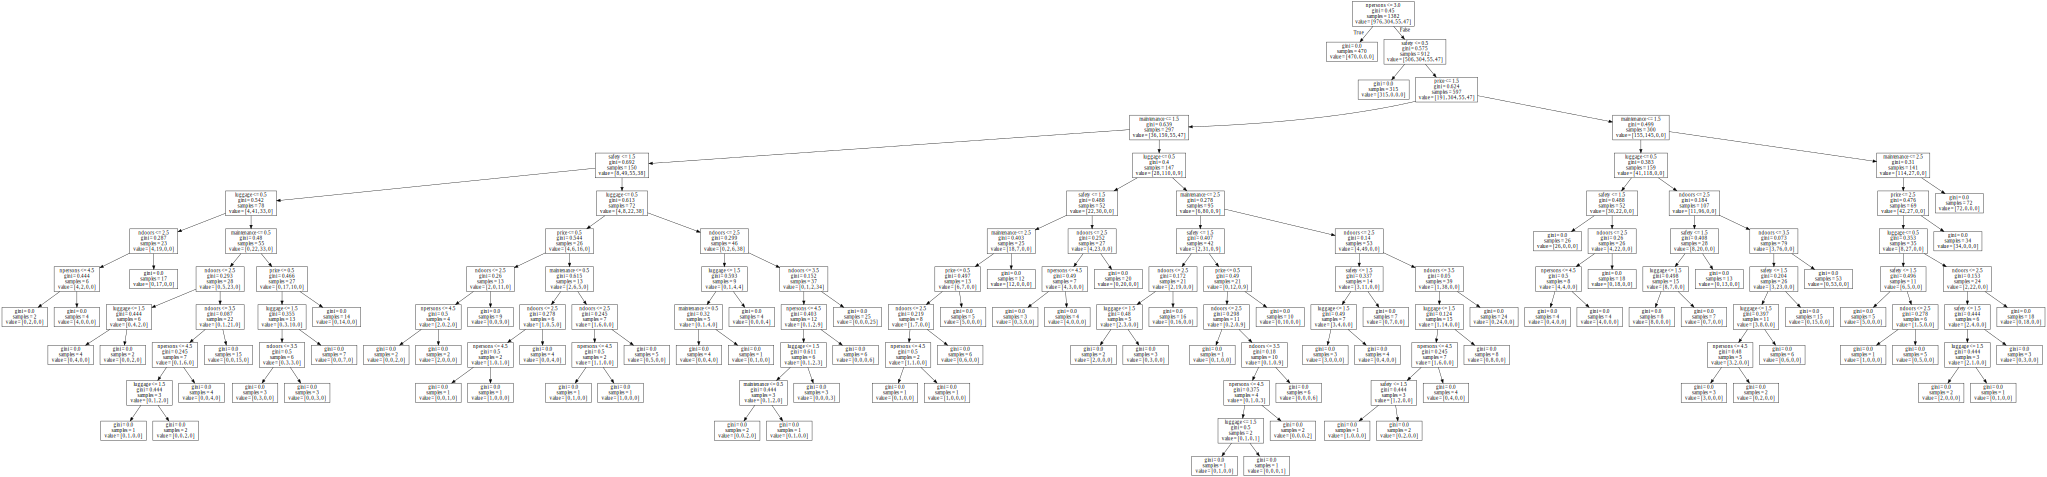

In [0]:
display(graphviz.Source(tree.export_graphviz(best_model, feature_names = X.keys(), max_depth = 12)))

#Splitting Criteria 1: Gini impurity:

Gini impurity is an index assigned to each node. It measures the probability that a randomly chosen instance in a node is misclassified. 

Let's imagine that there exist $C$ classes in a given node. The Gini index is then calculated in the following way

Gini = $ \sum_{i=1}^{N_c} p_{i} \sum_{j\neq i} p_{j} = 1 - \sum_{i=1}^{Nc} p_{i}^{2}$

Note that the Gini index of a given node has a lower bound of zero.

A ***perfect split*** would divid the parent node such that the Gini index of at least one of the nodes is zero! 

Therefore, splitting based on the Gini index aims to minimize the **misclassification probability**. 

Splitting is done by choosing a feature and a value of the feature. An optimal feature and its corresponding value are chosen such that the difference between the *weighted* sum of the Gini indices of the child nodes and the Gini index of the parent node is minimized. In other words:

$\Delta$ Gini = Gini (parent node) - $\frac{\mathrm{size \; of \; the \; first \; child \; node\;}}{\rm size \;of \;the \;parent \;node} $Gini (the first child node) - $\frac{\mathrm{size \; of \; the \; second \; child \; node\;}}{\rm size \;of \;the \;parent \;node} $Gini (the second child node)

As an example, note that how in the first branch of our model, splitting based on the capasity of the car can already result in a child node with cars that have 0 values (or unaccepted) according to the dataset. 

A child-node, with a Gini index of 0 needs no further splitting because the misclassification probability of the instances within that node is zero! Such a child-node is also called a *leaf-node*!

#Splitting Criteria 2: Entropy/Information gain:

In informaion theory, an entropy or information of a system is calculated according to:

$S = - \sum_{i} p_i \log p_i$, 

where the summation is done over instances of the system. 

This is closely related to the concept of Entropy in statistical physics and thermodynamic in which we have: 

$S = - k_{B} \sum_{i} p_i \log p_i$, where $k_B$ is the Boltzman constant. In fact, the Boltzman distribution of a thermodynamical system can be estimated by minimizing this entropy term subject to a set of constraints. 

Let's assume that the instances in a node in the decision tree belong to are $N_c$ classes. Therefore $S = - \sum_{i=1}^{N_c} p_i \log p_i$. 

The entropy of a system is its information content. 

In decision trees based on information gain, the splitting feature and its corresponding value are chosen such that the information difference between the two child-nodes and the parent nodes is maximized. That is, the splitting aims to maximize the information gain:

$\Delta S$ = $S_{\rm \; the \; first \; child \; node}$ + $S_{\rm \; the \; second \; child \; node}$ - $S_{\rm parentd \; node}$
 
